#### MetaData - Prepared manually by taking the Fitness -https://royalsocietypublishing.org/doi/10.1098/rspb.2015.2292 & the allele count data and sequencing data - https://github.com/benjaminhgood/LTEE-metagenomic.

##### import libary

In [1]:
import sys
sys.path.append("../../..")
# sys.path.append("../../../data/")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, fisher_exact
import utility, importlib
from scipy.stats import spearmanr
import pingouin as pg
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
pd.set_option('mode.chained_assignment', None)

##### Read gain sheet data

In [3]:
df_Gain_calculated = pd.read_excel("../../../data/MetaData_ecoli_final.xlsx", sheet_name= "Gain score")
df_Gain_calculated.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain
0,63,intergenic,A->C,A,C,noncoding,p6,-10.385914
1,201,thrL,T->G,T,G,missense,p6,-1.750693
2,241,thrL,A->C,A,C,missense,m1,-0.911836
3,309,thrA,T->G,T,G,noncoding,m1,4.009052
4,322,thrA,A->G,A,G,noncoding,p3,1.532477


In [4]:
df_Gain_calculated.columns

Index(['Position', 'Gene', 'Allele', 'Ref_allele', 'Alt_allele', 'Annotation',
       'label', 'accumulated_gain'],
      dtype='object')

In [5]:
df_Gain_calculated[['Position', 'Gene', 'Allele', 'Ref_allele', 'Alt_allele']].drop_duplicates()

,Position,Gene,Allele,Ref_allele,Alt_allele
0,63,intergenic,A->C,A,C
1,201,thrL,T->G,T,G
2,241,thrL,A->C,A,C
3,309,thrA,T->G,T,G
4,322,thrA,A->G,A,G
...,...,...,...,...,...
36916,4629441,lasT,C->T,C,T
36917,4629541,lasT,C->T,C,T
36918,4629573,lasT,T->C,T,C
36919,4629600,lasT,A->G,A,G


In [6]:
df_Gain_calculated[df_Gain_calculated.duplicated(subset=['Position', 'Gene',
 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'])]

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain


##### Read Allele count and generation data from metasheet

In [7]:
df_Alt_allele_count_all_generation = pd.read_excel("../../../data/MetaData_ecoli_final.xlsx", sheet_name= "Mastersheet")
df_Alt_allele_count_all_generation.head()

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
0,chrI,1554,thrA,C->A,missense,0,1,0,2,1.0,...,0,0,1.0,0.0,1.0,0.0,0.0,C,A,p1
1,chrI,1556,thrA,C->A,synonymous,0,0,0,2,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,A,p1
2,chrI,2450,thrA,G->T,synonymous,0,0,0,0,0.0,...,81,41,109.0,129.0,4.0,67.0,8.0,G,T,p1
3,chrI,4274,thrC,C->T,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,T,p1
4,chrI,6400,yaaA,T->G,missense,0,0,0,0,2.0,...,0,0,0.0,0.0,0.0,0.0,0.0,T,G,p1


##### Check if any duplicated row

In [8]:
df_Alt_allele_count_all_generation[df_Alt_allele_count_all_generation.duplicated(subset=['Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'])]

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
2028,chrI,450000,ylaB,A->G,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,A,G,p3


##### Read Evo score

In [9]:
df_evo = pd.read_csv("../../../data/evo_score.csv")
df_evo.head()

,CHROM,Position,Gene,Allele,ref_evo_score,alt_evo_score
0,chrI,201,thrL,T->G,-1.624657,-1.671160
1,chrI,241,thrL,A->C,-2.017771,-2.014411
2,chrI,535,thrA,C->T,-2.047866,-2.031197
3,chrI,1162,thrA,T->C,-1.954817,-1.960696
4,chrI,1170,thrA,C->T,-1.918591,-1.918067


##### delete duplicate row in df_Alt_allele_count_all_generation dataframe where duplicate indicate when ['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'] are same in mutiple row


In [10]:
df_Alt_allele_count_all_generation.drop_duplicates(subset=['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'], inplace=True)
df_Alt_allele_count_all_generation.reset_index(inplace=True, drop=True)
# df_Alt_allele_count_all_generation

In [11]:
df_Alt_allele_count_all_generation.head()

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
0,chrI,1554,thrA,C->A,missense,0,1,0,2,1.0,...,0,0,1.0,0.0,1.0,0.0,0.0,C,A,p1
1,chrI,1556,thrA,C->A,synonymous,0,0,0,2,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,A,p1
2,chrI,2450,thrA,G->T,synonymous,0,0,0,0,0.0,...,81,41,109.0,129.0,4.0,67.0,8.0,G,T,p1
3,chrI,4274,thrC,C->T,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,T,p1
4,chrI,6400,yaaA,T->G,missense,0,0,0,0,2.0,...,0,0,0.0,0.0,0.0,0.0,0.0,T,G,p1


##### Read LLR Score

In [12]:
df_esm = pd.read_excel("../../../data/LLR.xlsx")
df_esm.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,Start,End,Strand,...,has_space,WT_aa_made2,comparison2,Mut_aa_made,SNP,seq_id_x,universal_id,seq_id_y,mut_name,esm_score
0,241,thrL,A->C,A,C,missense,m1,190,255,+,...,False,MKRISTTITTTITITTGNGAG,True,MKRISTTITTTITITTGHGAG,N18H,241_thrL,241_thrL_N18H,241_thrL,N18H,-4.279933
1,1615,thrA,T->G,T,G,missense,m1,336,2798,+,...,False,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,True,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,I427S,1615_thrA,1615_thrA_I427S,1615_thrA,I427S,-11.530375
2,8430,talB,T->G,T,G,missense,m1,8236,9189,+,...,False,MTDKLTSLRQYTTVVADTGDIAAMKLYQPQDATTNPSLILNAAQIP...,True,MTDKLTSLRQYTTVVADTGDIAAMKLYQPQDATTNPSLILNAAQIP...,D65E,8430_talB,8430_talB_D65E,8430_talB,D65E,-5.331029
3,12527,dnaK,A->C,A,C,missense,m1,12161,14077,+,...,False,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,True,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,M123L,12527_dnaK,12527_dnaK_M123L,12527_dnaK,M123L,-4.669276
4,13974,dnaK,A->C,A,C,missense,m1,12161,14077,+,...,False,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,True,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,Q605P,13974_dnaK,13974_dnaK_Q605P,13974_dnaK,Q605P,-7.992450


##### Drop Duplicates if any in df_esm

In [13]:
df_esm_no_duplicates = df_esm[["Position",  "Gene", "label", "esm_score", "Allele"]].drop_duplicates(subset= ["Position",  "Gene", "label", "Allele"], keep='first')
df_esm_no_duplicates.dropna(inplace=True)
df_esm_no_duplicates.reset_index(inplace=True, drop=True)
df_esm_no_duplicates.head()

,Position,Gene,label,esm_score,Allele
0,241,thrL,m1,-4.279933,A->C
1,1615,thrA,m1,-11.530375,T->G
2,8430,talB,m1,-5.331029,T->G
3,12527,dnaK,m1,-4.669276,A->C
4,13974,dnaK,m1,-7.992450,A->C


##### Merge Gain score and allele count

In [14]:
df_complete = pd.merge(df_Gain_calculated,df_Alt_allele_count_all_generation, on=['Position','Gene','Allele','Annotation','Ref_allele','Alt_allele','label'], how = "left")
df_complete.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain,CHROM,AC:0,...,AC:55500,AC:56000,AC:56500,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000
0,63,intergenic,A->C,A,C,noncoding,p6,-10.385914,chrI,0,...,49,78,45,22,36,39.0,11.0,1.0,1.0,6.0
1,201,thrL,T->G,T,G,missense,p6,-1.750693,chrI,0,...,100,140,93,28,79,62.0,15.0,3.0,0.0,13.0
2,241,thrL,A->C,A,C,missense,m1,-0.911836,chrI,0,...,6,1,2,0,0,0.0,0.0,0.0,0.0,0.0
3,309,thrA,T->G,T,G,noncoding,m1,4.009052,chrI,0,...,0,0,0,0,0,0.0,1.0,2.0,7.0,9.0
4,322,thrA,A->G,A,G,noncoding,p3,1.532477,chrI,0,...,23,24,13,16,26,8.0,30.0,22.0,23.0,0.0


##### Extract the column relavent for current analysis from allele count dataframe (all the generation wise allele count, 'CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label')


In [15]:
filtered_list = [item for item in df_complete if item.startswith("AC")] ## Fiter the column starting with "AC" which indicate allele count
filtered_list.extend(['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label', "accumulated_gain"]) ##Add other relavent information
df_allele_generation = df_complete[filtered_list]
df_allele_generation.head() # Get complete dataframe containing all generation wise allele count and other relavent column

,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,...,AC:60000,CHROM,Position,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain
0,0,0,0,0,0.0,0,0,0,0,0,...,6.0,chrI,63,intergenic,A->C,noncoding,A,C,p6,-10.385914
1,0,0,0,0,0.0,0,0,0,0,0,...,13.0,chrI,201,thrL,T->G,missense,T,G,p6,-1.750693
2,0,0,0,0,0.0,0,0,0,0,0,...,0.0,chrI,241,thrL,A->C,missense,A,C,m1,-0.911836
3,0,0,0,0,0.0,0,0,0,0,0,...,9.0,chrI,309,thrA,T->G,noncoding,T,G,m1,4.009052
4,0,0,0,0,0.0,0,0,0,0,0,...,0.0,chrI,322,thrA,A->G,noncoding,A,G,p3,1.532477


##### Define mutator and non-mutator population 

In [16]:
mutator_list = ['m1', 'm2', 'm3', 'm4', 'p3', 'p6']
non_mutator_list = ['p1', 'p2', 'p4', 'p5', 'm5', 'm6']

##### Find the generation which have missing value 

In [17]:
nan_columns = df_allele_generation.columns[df_allele_generation.isna().any()]
df_with_nan = df_allele_generation[nan_columns]
nan_counts = df_allele_generation.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
print("\n Number of NaN values in each column:")
print(nan_counts)


 Number of NaN values in each column:
AC:2500      355
AC:15000    4953
AC:46500     331
AC:58000    3753
AC:58500     355
AC:59000     355
AC:59500     355
AC:60000     355
dtype: int64


##### Drop the generation having nan values

In [18]:
df_allele_generation.drop(nan_counts.index.tolist(), axis = 1, inplace=True)
df_allele_generation.reset_index(inplace=True, drop = True)
df_allele_generation.head()

,AC:0,AC:1000,AC:1500,AC:2000,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,AC:6000,...,AC:57500,CHROM,Position,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain
0,0,0,0,0,0,0,0,0,0,0,...,36,chrI,63,intergenic,A->C,noncoding,A,C,p6,-10.385914
1,0,0,0,0,0,0,0,0,0,0,...,79,chrI,201,thrL,T->G,missense,T,G,p6,-1.750693
2,0,0,0,0,0,0,0,0,0,0,...,0,chrI,241,thrL,A->C,missense,A,C,m1,-0.911836
3,0,0,0,0,0,0,0,0,0,0,...,0,chrI,309,thrA,T->G,noncoding,T,G,m1,4.009052
4,0,0,0,0,0,0,0,0,0,0,...,26,chrI,322,thrA,A->G,noncoding,A,G,p3,1.532477


##### Create dataset having all mutation info in proper form for easy calculation
##### Make a dataframe having column ['label', 'CHROM', 'Position', 'Gene', 'Allele', 'Annotation', 'generation', 'allele count', 'generation_number']

In [19]:
data_all_copy = df_allele_generation.copy()
all_mutation = pd.DataFrame() # The all_mutation dataframe contain generation and population wise accumulated gain

for i in data_all_copy.columns[:-9]:
    new_df_tmp = pd.DataFrame()
    new_df = data_all_copy[data_all_copy.loc[:, i]!=0]
    new_df_tmp = new_df[["label", 'CHROM', 'Position', 'Gene', 'Allele', 'Annotation']]
    new_df_tmp.loc[:, "generation"] = i
    new_df_tmp.loc[:, "AG"] = new_df.loc[:, "accumulated_gain"]
    new_df_tmp.loc[:, "allele count"] = new_df.loc[:, i]
    all_mutation = pd.concat([all_mutation, new_df_tmp], axis = 0)
    
    
all_mutation.reset_index(inplace=True, drop=True)
all_mutation['generation_number'] = all_mutation['generation'].str.extract(r'(\d+)').astype(int)
for i in range(all_mutation.shape[0]):
    
    if all_mutation.loc[i, "label"] in mutator_list:
        all_mutation.loc[i, "mutator"] = "mutator"
    if all_mutation.loc[i, "label"] in non_mutator_list:
        all_mutation.loc[i, "mutator"] = "non mutator"

all_mutation.head()

,label,CHROM,Position,Gene,Allele,Annotation,generation,AG,allele count,generation_number,mutator
0,m6,chrI,1457,thrA,G->A,missense,AC:0,-8.160701,1,0,non mutator
1,m2,chrI,2098,thrA,A->G,missense,AC:0,0.007780,1,0,mutator
2,m2,chrI,2942,thrB,A->G,missense,AC:0,-4.953477,1,0,mutator
3,m4,chrI,5437,yaaX,A->G,missense,AC:0,-10.279634,1,0,mutator
4,m5,chrI,7129,yaaJ,A->C,missense,AC:0,2.182288,2,0,non mutator


##### Remove white spaces from columns

In [20]:
df_esm_no_duplicates["Gene"] = df_esm_no_duplicates["Gene"].str.strip()
all_mutation["Gene"] = all_mutation["Gene"].str.strip()
df_esm_no_duplicates["Allele"] = df_esm_no_duplicates["Allele"].str.strip()
all_mutation["Allele"] = all_mutation["Allele"].str.strip()

##### Merge LLR score with Allele count

In [21]:
all_mutation_with_esm_1b_score = pd.merge(all_mutation, df_esm_no_duplicates, on = ["label", 'Position', "Gene", 'Allele'], how="left")
all_mutation_with_esm_1b_score_drop_na = all_mutation_with_esm_1b_score.dropna(subset=["esm_score"])    ##### drop the row where esm score is not available
all_mutation_with_esm_1b_score_drop_na.reset_index(inplace=True, drop=True)
all_mutation_with_esm_1b_score_drop_na.head()

,label,CHROM,Position,Gene,Allele,Annotation,generation,AG,allele count,generation_number,mutator,esm_score
0,m6,chrI,1457,thrA,G->A,missense,AC:0,-8.160701,1,0,non mutator,-3.043034
1,m2,chrI,2098,thrA,A->G,missense,AC:0,0.007780,1,0,mutator,-9.017883
2,m2,chrI,2942,thrB,A->G,missense,AC:0,-4.953477,1,0,mutator,-2.160521
3,m4,chrI,5437,yaaX,A->G,missense,AC:0,-10.279634,1,0,mutator,-3.740739
4,m5,chrI,7129,yaaJ,A->C,missense,AC:0,2.182288,2,0,non mutator,-6.933856


In [22]:
all_mutation_with_esm_1b_score_drop_na.shape

(495837, 12)

##### Merge Evo score with LLR and kGain

In [23]:
all_mutation_with_esm_1b_score_drop_na = pd.merge(all_mutation_with_esm_1b_score_drop_na, df_evo, on = ['CHROM', 'Position', 'Gene', 'Allele'])
all_mutation_with_esm_1b_score_drop_na.head()

,label,CHROM,Position,Gene,Allele,Annotation,generation,AG,allele count,generation_number,mutator,esm_score,ref_evo_score,alt_evo_score
0,m6,chrI,1457,thrA,G->A,missense,AC:0,-8.160701,1,0,non mutator,-3.043034,-1.792698,-1.823025
1,m6,chrI,1457,thrA,G->A,missense,AC:13500,-8.160701,3,13500,non mutator,-3.043034,-1.792698,-1.823025
2,m6,chrI,1457,thrA,G->A,missense,AC:14000,-8.160701,5,14000,non mutator,-3.043034,-1.792698,-1.823025
3,m6,chrI,1457,thrA,G->A,missense,AC:14500,-8.160701,4,14500,non mutator,-3.043034,-1.792698,-1.823025
4,m6,chrI,1457,thrA,G->A,missense,AC:15500,-8.160701,12,15500,non mutator,-3.043034,-1.792698,-1.823025


##### Plot accumulated gain vs type of mutator against essential and non essential gene

In [24]:
df_essential_gene = pd.read_excel("../../../data/gene type.xlsx")
df_essential_gene.head()

,Gene,type
0,thrL,non-essential
1,thrA,non-essential
2,thrB,non-essential
3,thrC,non-essential
4,yaaX,non-essential


##### drop row where gene name is not available

In [25]:
df_essential_gene.dropna(subset=["Gene"], inplace=True)
df_essential_gene.reset_index(inplace=True, drop=True)
df_essential_gene["Gene"] = df_essential_gene["Gene"].str.strip() # Trim white spaces from "Gene" column
df_essential_gene.head()

,Gene,type
0,thrL,non-essential
1,thrA,non-essential
2,thrB,non-essential
3,thrC,non-essential
4,yaaX,non-essential


##### Merge all_mutation with df_essential_gene while using "Gene" as key

In [26]:
df_gene_type_gain = pd.merge(all_mutation, df_essential_gene, on = ["Gene"])
df_gene_type_gain.head()

,label,CHROM,Position,Gene,Allele,Annotation,generation,AG,allele count,generation_number,mutator,type
0,m6,chrI,1457,thrA,G->A,missense,AC:0,-8.160701,1,0,non mutator,non-essential
1,m2,chrI,2098,thrA,A->G,missense,AC:0,0.007780,1,0,mutator,non-essential
2,p4,chrI,1335,thrA,C->T,missense,AC:1000,-7.350176,1,1000,non mutator,non-essential
3,p1,chrI,1554,thrA,C->A,missense,AC:1000,-4.354439,1,1000,non mutator,non-essential
4,p6,chrI,1822,thrA,T->G,missense,AC:1000,-7.098376,1,1000,mutator,non-essential


In [27]:
# Get the columns that start with 'AC'
ac_columns = [col for col in df_allele_generation.columns if col.startswith('AC')]

# Sum the columns column-wise
df_allele_generation["sum of alt AC"] =  df_allele_generation[ac_columns].sum(axis=1)

##### fig2c. Contour plot of np.loge(sum of allele count aceoss generation + 1)  vs kGain

In [28]:
slope, intercept, r_value, p_value, std_err = linregress(x = df_allele_generation['accumulated_gain'], y = np.log(df_allele_generation['sum of alt AC'] + 1))


In [29]:
slope, intercept, r_value, p_value, std_err = linregress(x = df_allele_generation['accumulated_gain'], y = np.log(df_allele_generation['sum of alt AC'] + 1))


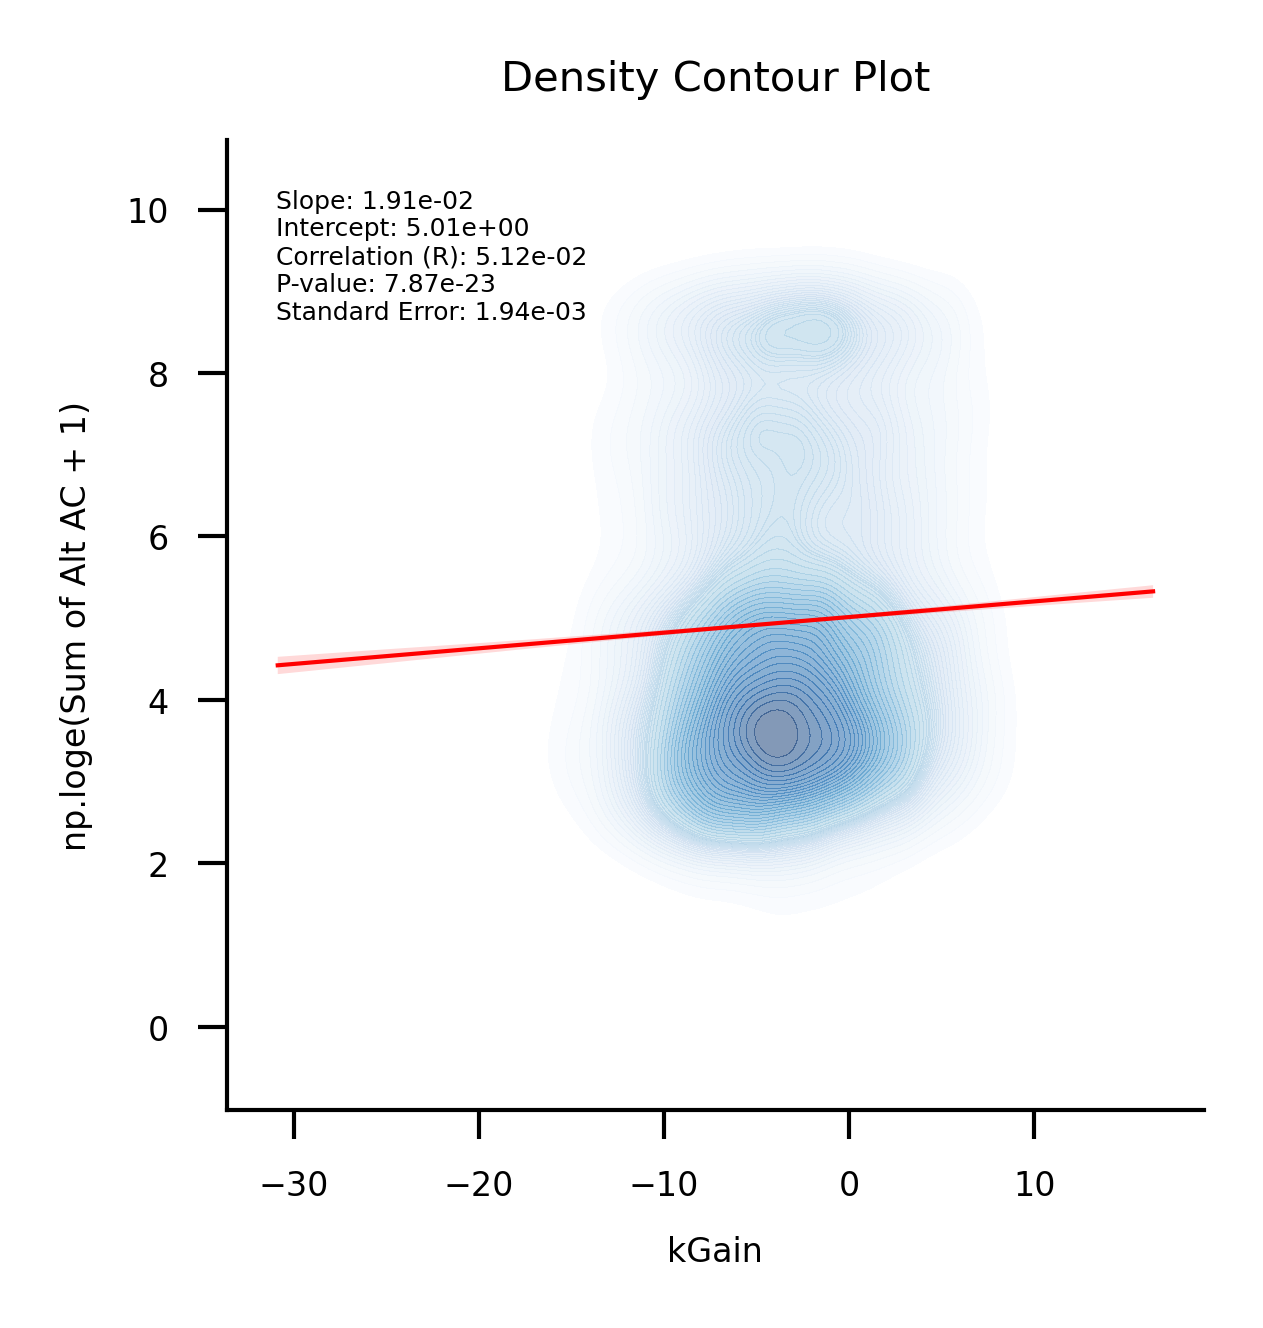

In [30]:

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(2.1, 2.1), dpi = 600)


# Scatter Plot + Regression Line
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x = df_allele_generation['accumulated_gain'], y = np.log(df_allele_generation['sum of alt AC'] + 1))

# Round values to 3 decimal places
slope = f"{slope:.2e}"
intercept = f"{intercept:.2e}"
r_value = f"{r_value:.2e}"
# r_squared = f"{r_value:.2e}"
p_value = f"{p_value:.2e}"
std_err = f"{std_err:.2e}"


# Create figure and axis
# fig, ax = plt.subplots(figsize=(2, 5))

# KDE Contour Plot (Density Representation)
ax = sns.kdeplot(
    x=df_allele_generation['accumulated_gain'], 
    y=np.log(df_allele_generation['sum of alt AC'] + 1), 
    levels=50, 
    fill=True, 
    cmap="Blues", 
    alpha=0.5,
    ax=ax
)

# Regression Line Without Scatter
ax = sns.regplot(
    x=df_allele_generation['accumulated_gain'], 
    y=np.log(df_allele_generation['sum of alt AC'] + 1), 
    scatter_kws={'s': 0},  # Hides scatter points
    line_kws={'color': 'red', 'linewidth': 0.5},  # Regression line in red
    ci=95,  # Confidence interval (default 95%)
    ax=ax
)

# Overlay regression statistics on the plot
stats_text = (
    f"Slope: {slope}\n"
    f"Intercept: {intercept}\n"
    f"Correlation (R): {r_value}\n"
    # f"R-squared: {r_squared}\n"
    f"P-value: {p_value}\n"
    f"Standard Error: {std_err}"
)

ax.text(
    0.05, 0.95, stats_text, 
    transform=ax.transAxes, fontsize=3, verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.2", edgecolor="white", facecolor="white")
)


# Labels and title
ax.set_xlabel("kGain")
ax.set_ylabel("np.loge(Sum of Alt AC + 1)")
ax.set_title("Density Contour Plot", fontsize = 5)
# ax.set_yscale("log")

# Show the plot
# plt.show()
ax = utility.custom_figure_axis(ax, fontsize=4, show_ticks = True, rotation=0)

##### Generate generation wise median

In [31]:
# Group by 'generation_number' and calculate median for each score
generation_medians = all_mutation_with_esm_1b_score_drop_na.groupby('generation_number').agg({
    'esm_score': 'median',
    'AG': 'median',    
    'alt_evo_score': 'median'
}).reset_index()

generation_medians["smoothed AG"] = generation_medians["AG"].rolling(window=3, center=True).mean()
generation_medians["smoothed alt_evo_score"] = generation_medians["alt_evo_score"].rolling(window=3, center=True).mean()
generation_medians["smoothed esm_score"] = generation_medians["esm_score"].rolling(window=3, center=True).mean()
generation_medians

,generation_number,esm_score,AG,alt_evo_score,smoothed AG,smoothed alt_evo_score,smoothed esm_score
0,0,-6.571366,-4.754296,-1.947789,NaN,NaN,NaN
1,1000,-6.253197,-3.970877,-1.957283,-4.230790,-1.960092,-6.485731
2,1500,-6.632629,-3.967198,-1.975204,-3.892768,-1.964081,-6.418662
3,2000,-6.370159,-3.740229,-1.959755,-3.826621,-1.962589,-6.462040
4,3000,-6.383330,-3.772436,-1.952808,-3.745083,-1.955634,-6.371873
...,...,...,...,...,...,...,...
104,55500,-6.055198,-3.482613,-1.957800,-3.461768,-1.957441,-6.057442
105,56000,-6.060603,-3.468818,-1.956949,-3.475246,-1.957835,-6.059976
106,56500,-6.064127,-3.474308,-1.958755,-3.481209,-1.957530,-6.043514
107,57000,-6.005813,-3.500502,-1.956886,-3.477964,-1.957996,-6.042231


In [32]:
# all_mutation_with_esm_1b_score_drop_na['Gain_Group'] = np.where(all_mutation_with_esm_1b_score_drop_na["accumulated_gain"] <= all_mutation_with_esm_1b_score_drop_na["accumulated_gain"].median(), 'Below or Equal Median', 'Above Median')
# p_value = utility.man_whiteney(all_mutation_with_esm_1b_score_drop_na[all_mutation_with_esm_1b_score_drop_na["Gain_Group"]=='Above Median']["sum of alt AC"], all_mutation_with_esm_1b_score_drop_na[all_mutation_with_esm_1b_score_drop_na["Gain_Group"]=='Below or Equal Median']["sum of alt AC"])#[1]

##### Sum of Alternate Allele Count vs kGain bins (Divided w.r.t median) vs Gain_Group (fig - 3d)

P-value = 2.50e-26 and effect size = 2.61e-01


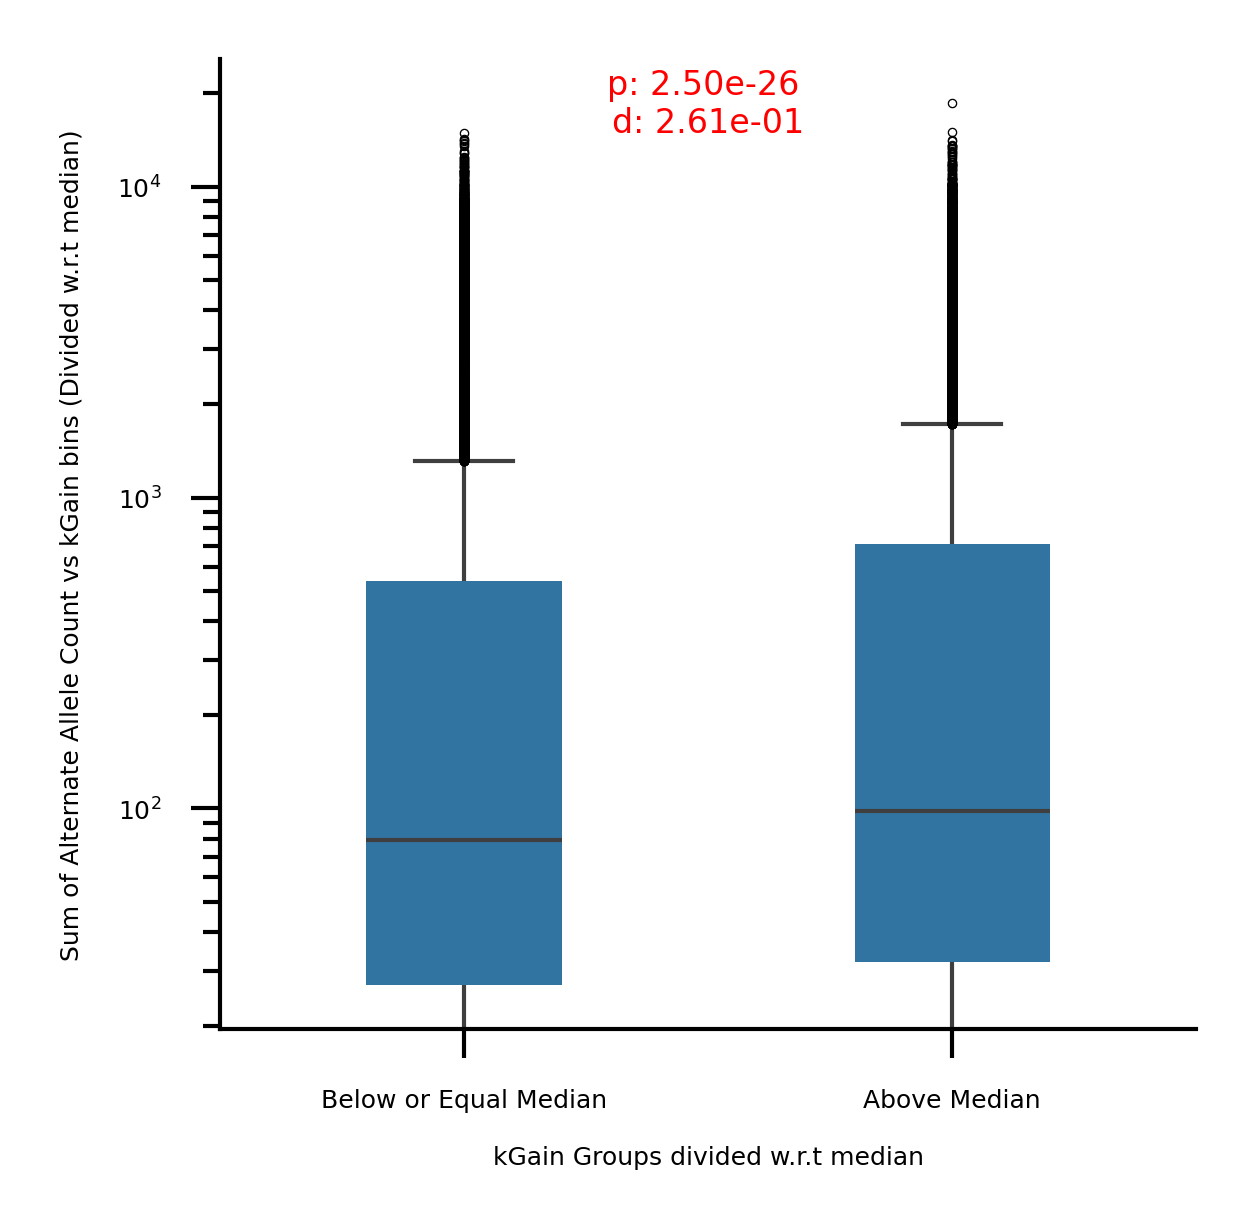

In [33]:
df_allele_generation['Gain_Group'] = np.where(df_allele_generation["accumulated_gain"] <= df_allele_generation["accumulated_gain"].median(), 'Below or Equal Median', 'Above Median')

fig, ax = plt.subplots(1, 1, figsize=(2.1, 2.1), dpi = 600)
ax =     sns.boxplot(x="Gain_Group", y="sum of alt AC", data=df_allele_generation, boxprops=dict(edgecolor="black", linewidth=0),ax=ax,flierprops=dict(marker='o', markeredgecolor='black'), width=0.4,linewidth=0.5, fliersize=0.15, dodge=True)
ax.set_xlabel('kGain Groups divided w.r.t median', fontsize=3)
ax.set_ylabel('Sum of Alternate Allele Count vs kGain bins (Divided w.r.t median)', fontsize=3)


ax = utility.return_box_with_p_effect_size(ax=ax, data = df_allele_generation, x_columns = "Gain_Group", y_columns = "sum of alt AC", group1_name = 'Above Median', group2_name =  'Below or Equal Median', y_pos = 15000, hue_columns=None, fontsize=4)
ax.set_yscale("log")
ax = utility.custom_figure_axis(ax, fontsize=3, show_ticks = True, rotation=0)


##### Generate p value for time series

In [34]:
all_mutation_with_esm_1b_score_drop_na_less_than_30K = all_mutation_with_esm_1b_score_drop_na[all_mutation_with_esm_1b_score_drop_na["generation_number"]<=30000]
p_stat_ag, ci_ag = utility.dba_stat(data =all_mutation_with_esm_1b_score_drop_na[["generation_number", "AG"]], group_by_col = "generation_number",target_col_name = "AG", num_permutations = 10000, random_state = 42)
p_stat_esm, ci_esm = utility.dba_stat(data =all_mutation_with_esm_1b_score_drop_na[["generation_number", "esm_score"]], group_by_col = "generation_number", target_col_name = "esm_score", num_permutations = 10000, random_state = 42)
p_stat_evo, ci_evo = utility.dba_stat(data =all_mutation_with_esm_1b_score_drop_na[["generation_number", "alt_evo_score"]], group_by_col = "generation_number", target_col_name = "alt_evo_score", num_permutations = 10000, random_state = 42)
p_stat_ag_less_than_30k, ci_ag_less_than_30k = utility.dba_stat(data =all_mutation_with_esm_1b_score_drop_na_less_than_30K[["generation_number", "AG"]], group_by_col = "generation_number",target_col_name = "AG", num_permutations = 10000, random_state = 42)


##### fig. 2e,  2f, fig 2g: Plot median lines for LLR, kGain,  EVO vs generation number

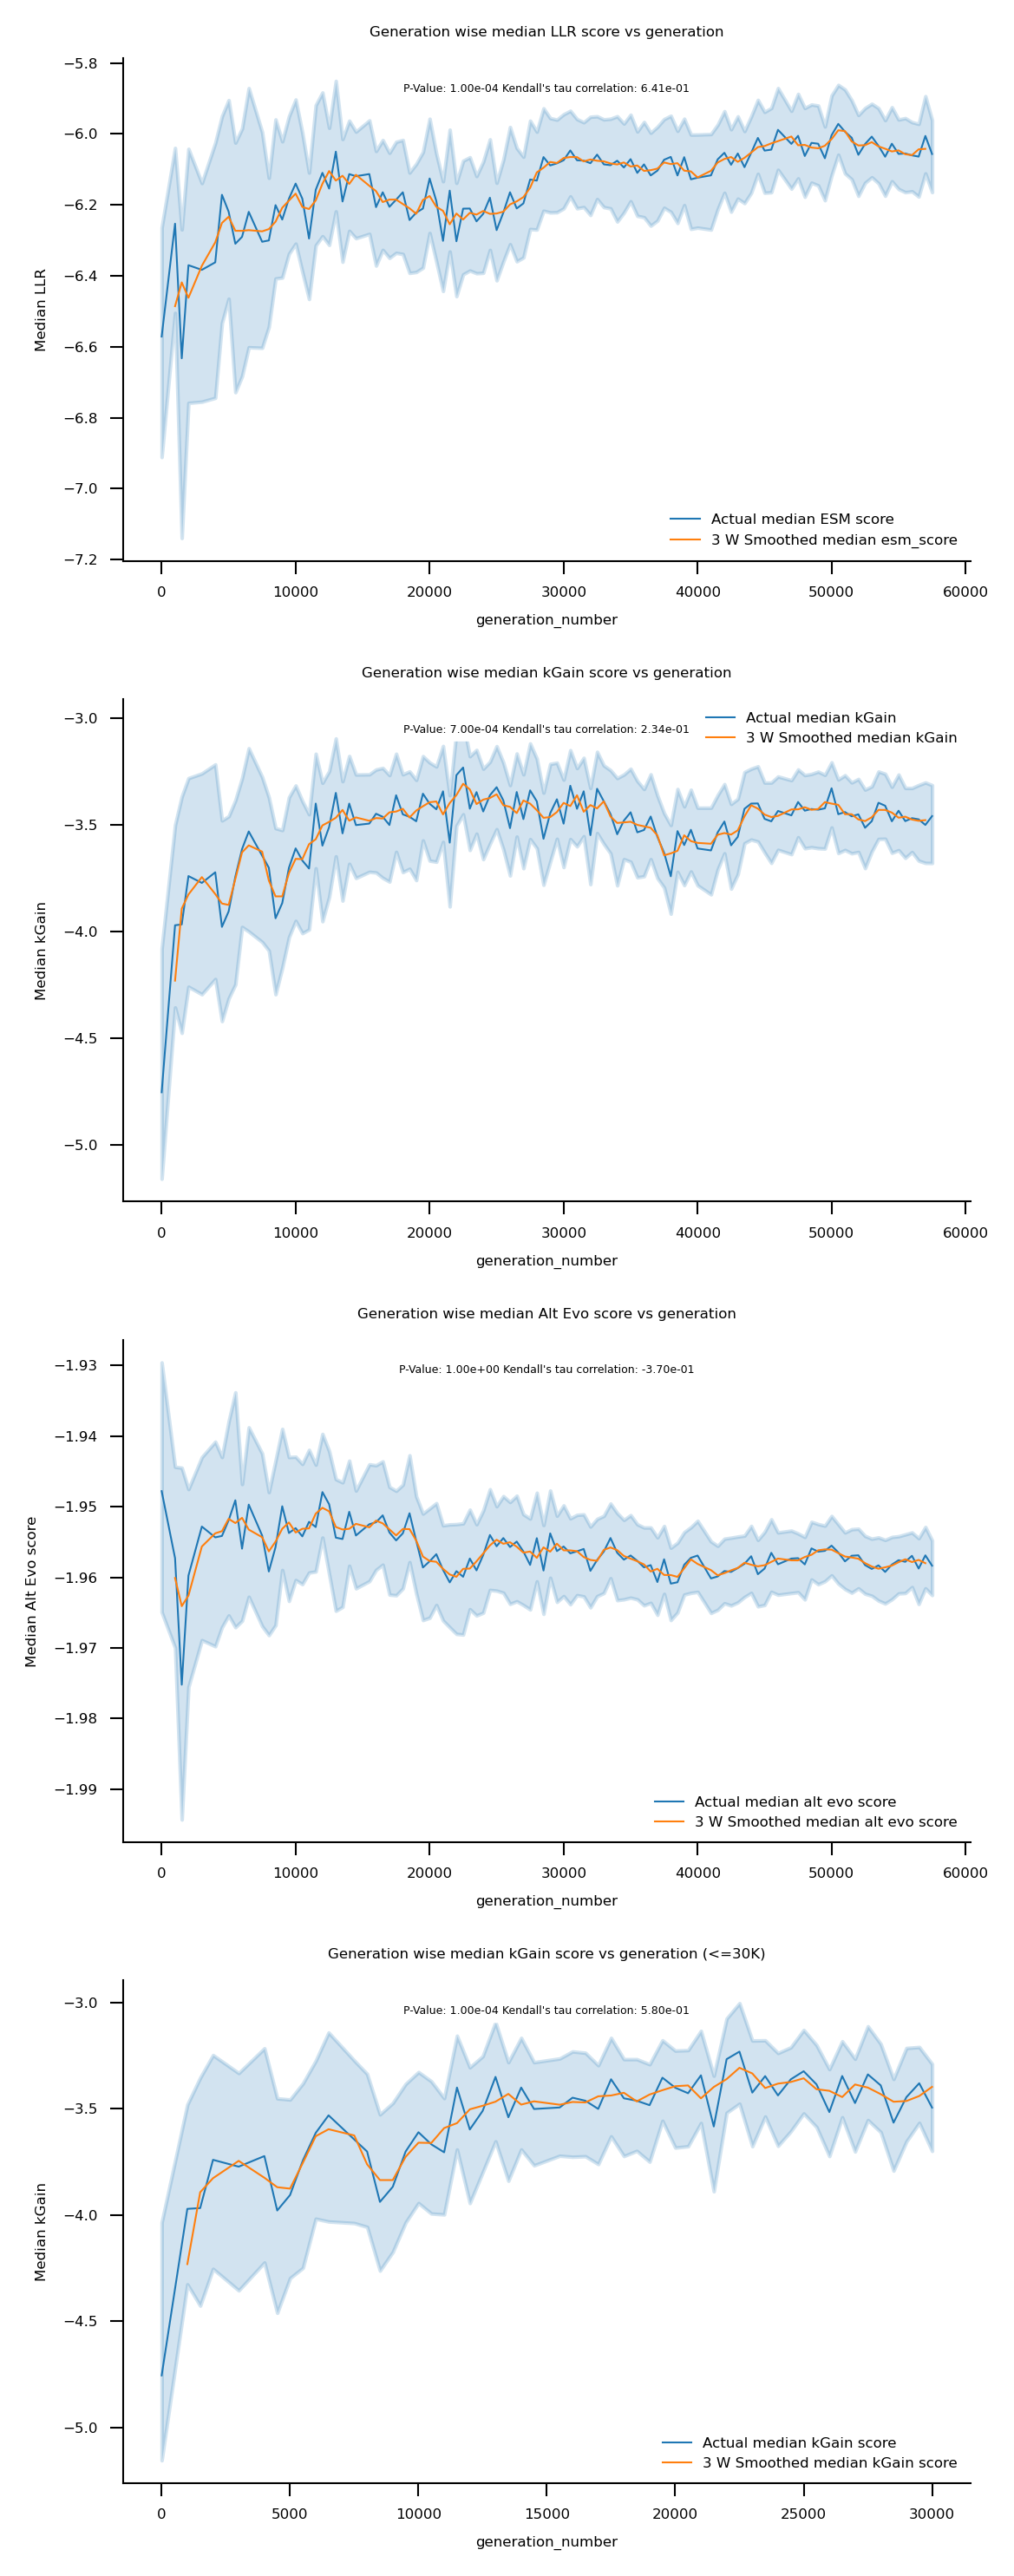

In [35]:
import seaborn as sns
fig, ax = plt.subplots(4, 1, figsize=(4, 10), dpi = 300)

ax[0] = sns.lineplot(all_mutation_with_esm_1b_score_drop_na, x = "generation_number",  y = "esm_score", ax=ax[0], lw = 0.5, label = "Actual median ESM score", estimator='median')
ax[0] = sns.lineplot(generation_medians, x = "generation_number",  y = "smoothed esm_score", ax=ax[0], lw = 0.5, label = "3 W Smoothed median esm_score", estimator='median')


ax[1] = sns.lineplot(all_mutation_with_esm_1b_score_drop_na, x = "generation_number",  y = "AG", ax=ax[1], lw = 0.5, label = "Actual median kGain", estimator='median')
ax[1] = sns.lineplot(generation_medians, x = "generation_number",  y = "smoothed AG", ax=ax[1], lw = 0.5, label = "3 W Smoothed median kGain", estimator='median')

ax[2] = sns.lineplot(all_mutation_with_esm_1b_score_drop_na, x = "generation_number",  y = "alt_evo_score", ax=ax[2], lw = 0.5, estimator='median', label = "Actual median alt evo score")
ax[2] = sns.lineplot(generation_medians, x = "generation_number",  y = "smoothed alt_evo_score", ax=ax[2], lw = 0.5, estimator='median', label = "3 W Smoothed median alt evo score")

ax[3] = sns.lineplot(all_mutation_with_esm_1b_score_drop_na[all_mutation_with_esm_1b_score_drop_na["generation_number"]<=30000], x = "generation_number",  y = "AG", ax=ax[3], lw = 0.5, estimator='median', label = "Actual median kGain score")
ax[3] = sns.lineplot(generation_medians[generation_medians["generation_number"]<=30000], x = "generation_number",  y = "smoothed AG", ax=ax[3], lw = 0.5, estimator='median', label = "3 W Smoothed median kGain score")

ax[0].set_ylabel("Median LLR")
ax[1].set_ylabel("Median kGain")
ax[2].set_ylabel("Median Alt Evo score")
ax[3].set_ylabel("Median kGain")

ax[0].set_title("Generation wise median LLR score vs generation", fontsize = 4)
ax[1].set_title("Generation wise median kGain score vs generation", fontsize = 4)
ax[2].set_title("Generation wise median Alt Evo score vs generation", fontsize = 4)
ax[3].set_title("Generation wise median kGain score vs generation (<=30K)", fontsize = 4)


ax[0].text(
    0.5, 0.95, f"P-Value: {p_stat_esm:.2e} Kendall's tau correlation: {ci_esm:.2e}", 
    transform=ax[0].transAxes, fontsize=3, verticalalignment='top', horizontalalignment='center',
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="white", facecolor="white")
)

ax[1].text(
    0.5, 0.95, f"P-Value: {p_stat_ag:.2e} Kendall's tau correlation: {ci_ag:.2e}", 
    transform=ax[1].transAxes, fontsize=3, verticalalignment='top', horizontalalignment='center',
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="white", facecolor="white")
)
ax[2].text(
    0.5, 0.95, f"P-Value: {p_stat_evo:.2e} Kendall's tau correlation: {ci_evo:.2e}", 
    transform=ax[2].transAxes, fontsize=3, verticalalignment='top', horizontalalignment='center',
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="white", facecolor="white")
)


ax[3].text(
    0.5, 0.95, f"P-Value: {p_stat_ag_less_than_30k:.2e} Kendall's tau correlation: {ci_ag_less_than_30k:.2e}", 
    transform=ax[3].transAxes, fontsize=3, verticalalignment='top', horizontalalignment='center',
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="white", facecolor="white")
)




for i in range(4):
    ax[i] = utility.custom_figure_axis(ax=ax[i], fontsize=4, show_ticks=True, rotation=0)
    ax[i].legend(fontsize = 4, frameon= False)

plt.tight_layout()
# plt.savefig("Generation wise median trend.pdf", dpi = 300)